In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

In [128]:
nyc_pumkins = pd.read_csv('pumkin_in_newyork.csv')

In [129]:
df = nyc_pumkins[['Item Size','High Price','Low Price']]

In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Encoded Size'] = le.fit_transform(df['Item Size'].astype(str))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
df['Price'] = (df['High Price'] + df['Low Price'])/2

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
df.drop(columns = ['Item Size','High Price','Low Price'],inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [133]:
df.loc[:,'Class'] = df.loc[:,'Encoded Size'].apply(lambda x : 1 if x > 2 else 0 )
#apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [149]:
prices = df['Price'].values.reshape(-1,1)
sizes = df['Encoded Size'].values.reshape(-1,1)


In [150]:
poly = PolynomialFeatures(degree=2)
poly_prices = poly.fit_transform(prices)

In [151]:
lm = LinearRegression()
lm.fit(poly_prices,sizes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
predicted_sizes = lm.predict(poly_prices)

In [153]:
r2_score(sizes,predicted_sizes)

0.06391694675293802

,0,1,2
0,1.0,0.650430,0.423059
1,1.0,0.650430,0.423059
2,1.0,0.380522,0.144797
3,1.0,0.380522,0.144797
4,1.0,0.245568,0.060304
...,...,...,...
107,1.0,-1.076981,1.159888
108,1.0,-1.265917,1.602545
109,1.0,-1.265917,1.602545
110,1.0,-1.265917,1.602545


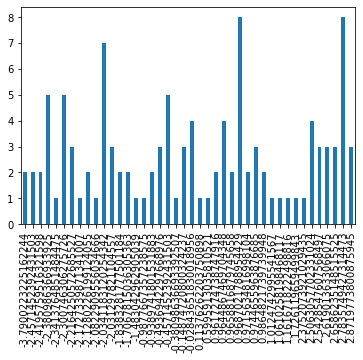

In [156]:
pd.Series((sizes - predicted_sizes).flatten()).value_counts().sort_index().plot(kind='bar')